In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mtick

In [15]:
df = pd.read_csv('../datasets/pib_per_capita/GDP.csv')

In [16]:
#mostra o dataframe
df


,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1/1/1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1/1/1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,1/1/2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,1/1/2006,520.17


In [17]:
# Removendo linhas duplicadas
df.drop_duplicates(inplace=True)

In [18]:
# Padronizar e limpar os nomes das colunas
df.columns = df.columns.str.strip()  # Remover espaços extras no início e no fim
df.columns = df.columns.str.lower()  # Converter para minúsculas
df.columns = df.columns.str.replace(' ', '')  # Substituir espaços por sublinhados
df.columns = df.columns.str.replace(r'[^\w\s]', '')  # Remover caracteres especiais, mantendo letras, números e espaços

In [19]:
# Limpar os valores na coluna 'gdp_pp' e converter para float
df['gdp_pp'] = df['gdp_pp'].str.strip().str.replace(',', '').astype(float)

In [20]:
# Substituir os valores zerados na coluna 'gdp_pp' por NaN
df['gdp_pp'] = df['gdp_pp'].replace(0, pd.NA)

In [21]:
# Ordenar os dados por região e ano
df = df.sort_values(by=['region', 'year'])
df

,country,region,year,gdp_pp
299,Bangladesh,Asia,1/1/1901,690.52
437,Bhutan,Asia,1/1/1901,625.21
552,Brunei,Asia,1/1/1901,1315.52
644,Cambodia,Asia,1/1/1901,723.53
782,China,Asia,1/1/1901,803.06
...,...,...,...,...
3914,Tanzania,Sub-Saharan Africa,1/1/2011,1269.58
3983,Togo,Sub-Saharan Africa,1/1/2011,949.34
4142,Uganda,Sub-Saharan Africa,1/1/2011,1260.03
4395,Zambia,Sub-Saharan Africa,1/1/2011,1480.69


In [22]:
# Calcular o crescimento percentual acumulado do PIB per capita
df['gdp_per_capita_growth'] = df.groupby('region')['gdp_pp'].transform(lambda x: (x.pct_change(fill_method=None) + 1).cumprod() - 1)

In [24]:
# Multiplicar por 100 para converter em porcentagem
df['gdp_per_capita_growth'] *= 100
df


,country,region,year,gdp_pp,gdp_per_capita_growth
299,Bangladesh,Asia,1/1/1901,690.52,NaN
437,Bhutan,Asia,1/1/1901,625.21,-945.808956
552,Brunei,Asia,1/1/1901,1315.52,9051.149858
644,Cambodia,Asia,1/1/1901,723.53,478.045531
782,China,Asia,1/1/1901,803.06,1629.786248
...,...,...,...,...,...
3914,Tanzania,Sub-Saharan Africa,1/1/2011,1269.58,14147.519781
3983,Togo,Sub-Saharan Africa,1/1/2011,949.34,8056.527693
4142,Uganda,Sub-Saharan Africa,1/1/2011,1260.03,13965.877967
4395,Zambia,Sub-Saharan Africa,1/1/2011,1480.69,18162.849970


In [25]:
# Calcular o crescimento acumulado total para cada região no período analisado
region_growth = df.groupby('region')['gdp_per_capita_growth'].last().sort_values(ascending=False)

In [29]:
# Selecionar as três regiões que mais cresceram
top_regions = region_growth.head(3).index

In [30]:
# Filtrar o DataFrame para conter apenas essas três regiões
df_top_regions = df[df['region'].isin(top_regions)]

In [32]:
# Calcular o crescimento médio acumulado em porcentagem para cada região
average_growth = df_top_regions.groupby('region')['gdp_per_capita_growth'].mean().sort_values(ascending=False)

In [33]:
# Exibir as regiões que mais cresceram e seus crescimentos médios acumulados em porcentagem
print(average_growth)


region
Europe                               84610.032453
Central America and the Caribbean    36614.614928
North America                        21237.777418
Name: gdp_per_capita_growth, dtype: float64


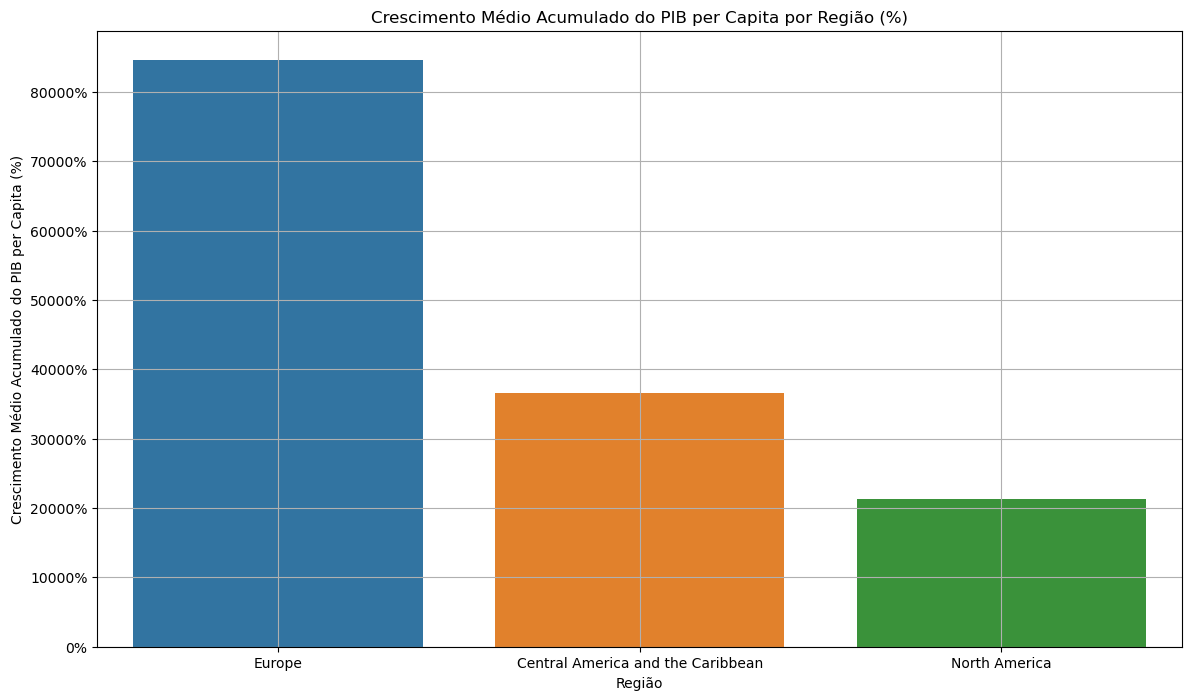

c:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


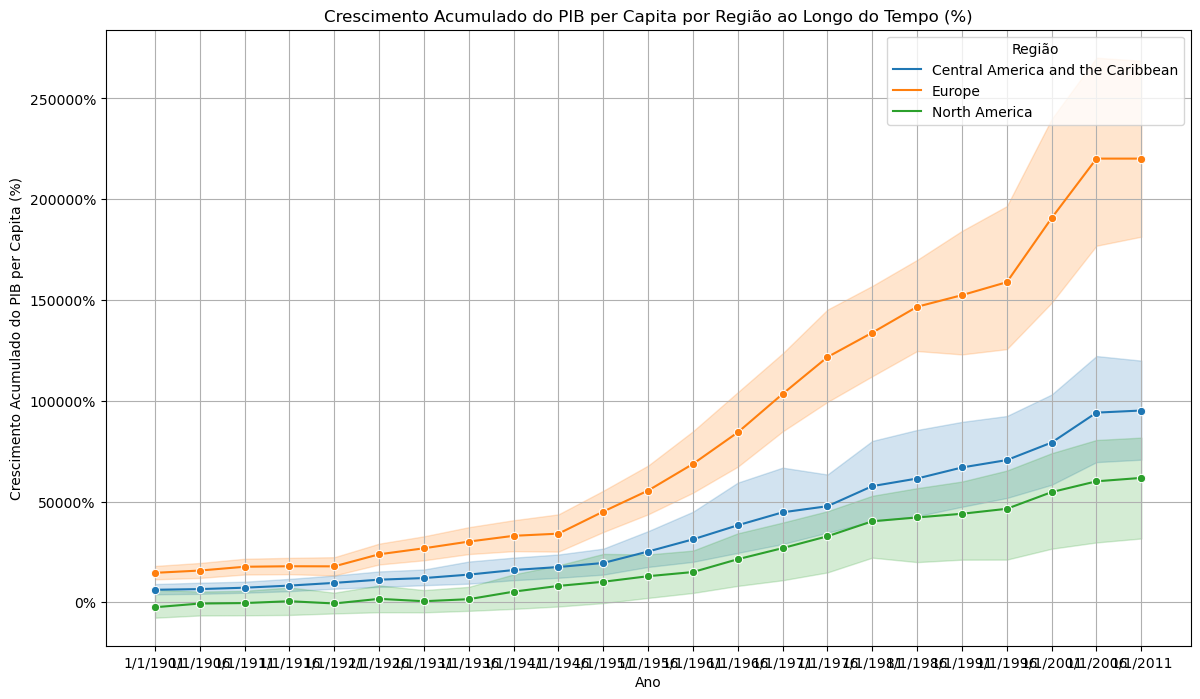

In [34]:
# Plotar o gráfico do crescimento médio acumulado em porcentagem
plt.figure(figsize=(14, 8))
sns.barplot(x=average_growth.index, y=average_growth.values)
plt.title('Crescimento Médio Acumulado do PIB per Capita por Região (%)')
plt.xlabel('Região')
plt.ylabel('Crescimento Médio Acumulado do PIB per Capita (%)')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

# Plotar o gráfico do crescimento acumulado ao longo do tempo para as três regiões selecionadas
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_top_regions, x='year', y='gdp_per_capita_growth', hue='region', marker='o')
plt.title('Crescimento Acumulado do PIB per Capita por Região ao Longo do Tempo (%)')
plt.xlabel('Ano')
plt.ylabel('Crescimento Acumulado do PIB per Capita (%)')
plt.legend(title='Região')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()